### Redes Neurais Convolucionais

Criar um classificador utilizando uma rede neural convolucional para o conjunto de dados de caracteres MINST:

    A- Dividir o conjunto de dados em treinamento, validação e teste.

    B- O exercício deve ser entregue com o código fonte em Python utilizado para treinamento e teste da rede, bem como com as informações dos melhores hiperparêmetros utilizados e as métricas de desempenho obtidas. Os gráficos contendo as curvas de aprendizado também deverão ser disponibilizados.

    Dicas:

    a. exemplo de carregamento do conjunto de dados MINST pode ser consultado no script "ClassificadorBinário.ipynb" da Aula 2.
    b. no caso deste exercício, o classificador precisa considerar todas as classes (i.e. números 0 a 9).

✅ 1. Carregamento e Pré-processamento dos Dados

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalização
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Redimensionar para [N, 28, 28, 1]
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

# Divisão do treino em treino + validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# One-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_val_cat = to_categorical(y_val, 10)
y_test_cat = to_categorical(y_test, 10)


2025-07-04 15:55:26.533734: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-04 15:55:26.782491: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-04 15:55:27.003889: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751655327.213037   13347 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751655327.270476   13347 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751655327.689451   13347 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 17s 2us/step


✅ 2. Construção da Rede Neural Convolucional

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/home/fernando/Área de trabalho/Dev/Machine-Learning/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-04 15:55:56.440298: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

✅ 3. Treinamento e Curvas de Aprendizado

In [3]:
history = model.fit(X_train, y_train_cat,
                    validation_data=(X_val, y_val_cat),
                    epochs=10,
                    batch_size=128)


Epoch 1/10


2025-07-04 15:55:57.001536: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


375/375 ━━━━━━━━━━━━━━━━━━━━ 63s 160ms/step - accuracy: 0.7381 - loss: 0.8041 - val_accuracy: 0.9741 - val_loss: 0.0878
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 168ms/step - accuracy: 0.9538 - loss: 0.1544 - val_accuracy: 0.9836 - val_loss: 0.0589
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 156ms/step - accuracy: 0.9687 - loss: 0.1073 - val_accuracy: 0.9869 - val_loss: 0.0490
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 151ms/step - accuracy: 0.9748 - loss: 0.0862 - val_accuracy: 0.9873 - val_loss: 0.0468
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 63s 168ms/step - accuracy: 0.9759 - loss: 0.0778 - val_accuracy: 0.9881 - val_loss: 0.0419
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 174ms/step - accuracy: 0.9788 - loss: 0.0671 - val_accuracy: 0.9894 - val_loss: 0.0395
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 178ms/step - accuracy: 0.9820 - loss: 0.0593 - val_accuracy: 0.9899 - val_loss: 0.0349
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 63s 168ms/step - accuracy: 0.9831 - loss: 0.0563 - val

✅ 4. Avaliação no Conjunto de Teste

In [4]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Acurácia no conjunto de teste: {test_acc:.4f}")


Acurácia no conjunto de teste: 0.9901


✅ 5. Gráficos de Curvas de Aprendizado

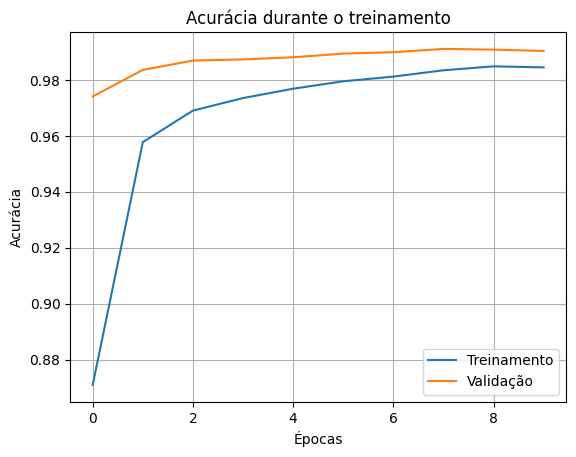

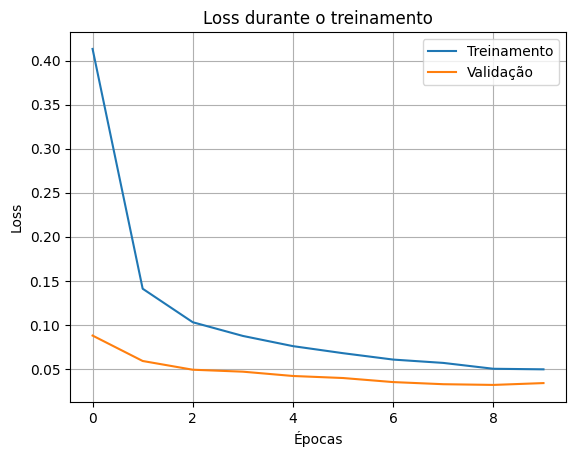

In [5]:
# Acurácia
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
